Desarrollar un modelo de regresión que permita predecir el
precio por metro cuadrado de una propiedad. El objetivo final es que el
modelo que desarrollen sea utilizado como tasador automático a ser
aplicados a las próximas propiedades que sean comercializadas por la
empresa.

1) Efectuar una limpieza del dataset provisto. Particularmente, deberá
diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

In [1]:
import pandas as pd
df = pd.read_csv('properatti.csv')

In [3]:
df.shape

(121220, 26)

In [2]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
121215    False
121216    False
121217    False
121218    False
121219    False
Length: 121220, dtype: bool

In [3]:
df.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [4]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [6]:
df.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

In [7]:
type(df)

pandas.core.frame.DataFrame

2) Realizar un análisis descriptivo de las principales variables.

Analizando los missings por columnas

In [4]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

Se observa que floor y expenses tienen la mayor cantidad de valores faltantes.

In [5]:
#Elimino missings
df = df.dropna()

In [6]:
#Verifico que no tengo missings
df.isnull().sum()

Unnamed: 0                    0
operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
state_name                    0
geonames_id                   0
lat-lon                       0
lat                           0
lon                           0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
price_usd_per_m2              0
price_per_m2                  0
floor                         0
rooms                         0
expenses                      0
properati_url                 0
description                   0
title                         0
image_thumbnail               0
dtype: int64

3) Crear nuevas columnas a partir de las características dadas que puedan
tener valor predictivo.

In [7]:
import seaborn as sns 

<AxesSubplot: xlabel='country_name', ylabel='count'>

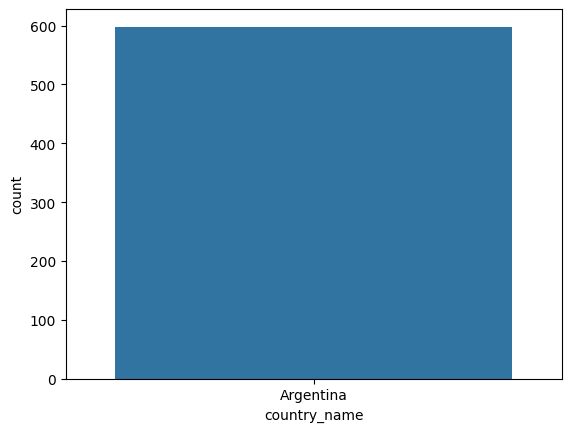

In [13]:
sns.countplot(x='country_name', data=df)  #Verifico el único país es Argentina

<AxesSubplot: xlabel='operation', ylabel='count'>

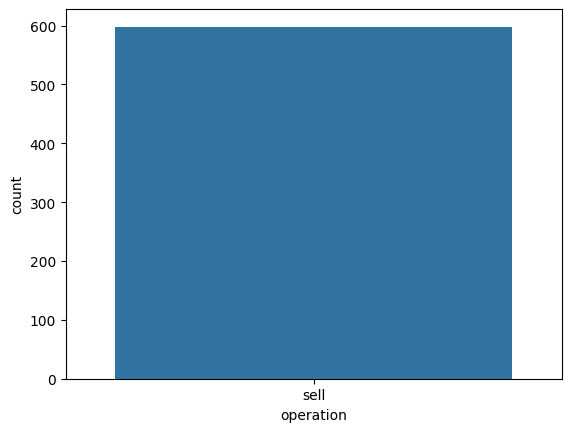

In [36]:
sns.countplot(x='operation', data=df) #Verifico todas la operaciones son ventas

<AxesSubplot: xlabel='property_type', ylabel='count'>

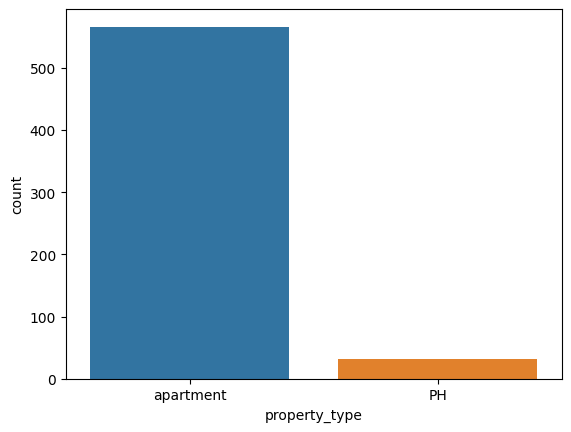

In [37]:
sns.countplot(x='property_type', data=df) 

In [8]:
#Elimino columnas inncesarias
df2 = df.drop(df.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13,18,21,22,23,24,25]], axis='columns')

In [9]:
df2.shape

(598, 7)

C:\Users\n_sar\AppData\Local\Temp\ipykernel_6292\2142440804.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


<AxesSubplot: >

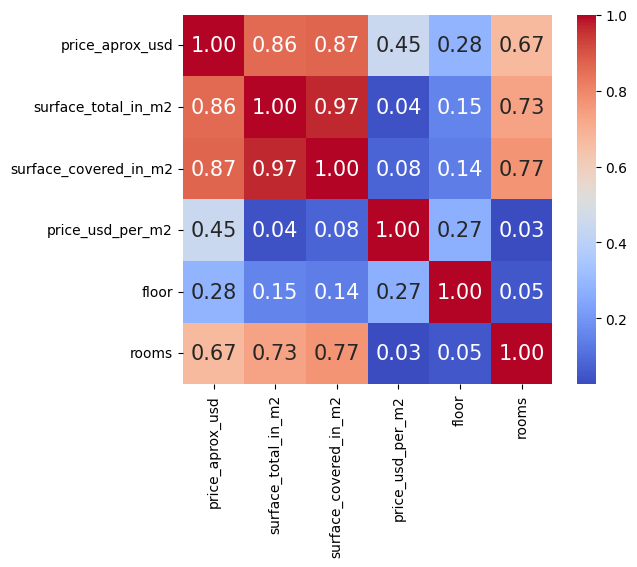

In [14]:
corr = df2.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 15}, cmap = 'coolwarm')

In [ ]:
#Preguntar
# Defino los valores de corte
pisos = ['2', '4', '6', '8', '10']

# Obtengo una lista de intervalos
agrupados = df2.cut('floor', pisos)
agrupados

### Aplicando el modelo de regresión

In [10]:
#Importemos las librerias
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [11]:
df2.columns

Index(['property_type', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms'],
      dtype='object')

In [12]:
X = df2[["surface_total_in_m2", "surface_covered_in_m2", "floor", "rooms"]] #Seleccionamos las variables predictoras
y = df2.price_aprox_usd #Defino el Target

In [15]:
#Separo en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
#Generamos el modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [16]:
#Fiteo el modelo
linear_model.fit(X_train,y_train)

LinearRegression()

In [18]:
#Evaluamos el modelo
import numpy as np
from sklearn.metrics import mean_squared_error
modelo = ['Regresion lineal']

for i, model in enumerate ([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict (X_test)
    
    print(f'Modelo benchmark: {modelo[i]}')
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raiz del error cuadratico medio en train: {rmse_train}')
    print(f'Raiz del error cuadratico medio en test: {rmse_test}')

Modelo benchmark: Regresion lineal
Raiz del error cuadratico medio en train: 63429.86555003257
Raiz del error cuadratico medio en test: 55775.39319776429
